<h1><span? style="color:blue"> Data Transformation:영국 중고 자동차 가격 데이터 </span>

<h1><span? style="color:blue"> 1. 데이터 둘러보기 & 데이터 합치기</span>  

<h3>작성자:이강인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv('/aiffel/data/cars.csv')

In [3]:
cars

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


In [4]:
cars.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [5]:
cars.describe() #이상치 살펴보기

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


In [6]:
cars.info() #type확인하기, 여럿 Null 값 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


In [7]:
cars.isna().sum() #null 값 처리 필요

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
dtype: int64

In [8]:
cars.nunique()

title                 455
Price                 866
Mileage(miles)       1570
Registration_Year      40
Previous Owners         9
Fuel type               6
Body type              10
Engine                 34
Gearbox                 2
Doors                   4
Seats                   6
Emission Class          6
Service history         1
dtype: int64

In [9]:
unique_values_df = pd.DataFrame(columns=['Column', 'Unique_Values']) #각 column 고유값 살펴보기

unique_values_df

,Column,Unique_Values


In [10]:
for column in cars.columns:
    unique_values_df = unique_values_df.append({
        'Column': column,
        'Unique_Values': cars[column].unique()
    }, ignore_index=True)

# 출력
unique_values_df

,Column,Unique_Values
0,title,"[SKODA FABIA, VAUXHALL CORSA, HYUNDAI I30, MIN..."
1,Price,"[6900, 1495, 949, 2395, 1000, 800, 798, 1995, ..."
2,Mileage(miles),"[70189, 88585, 137000, 96731, 85000, 124196, 1..."
3,Registration_Year,"[2016, 2008, 2011, 2010, 2013, 2007, 2009, 202..."
4,Previous Owners,"[3.0, 4.0, nan, 5.0, 1.0, 2.0, 6.0, 7.0, 9.0, ..."
5,Fuel type,"[Diesel, Petrol, Petrol Plug-in Hybrid, Petrol..."
6,Body type,"[Hatchback, Coupe, Estate, Saloon, Convertible..."
7,Engine,"[1.4L, 1.2L, 1.3L, 2.0L, 1.6L, 2.3L, 1.8L, 1.0..."
8,Gearbox,"[Manual, Automatic]"
9,Doors,"[5.0, 3.0, 4.0, 2.0, nan]"


In [11]:
pd.set_option('display.max_colwidth', None)

In [12]:
unique_values_df[unique_values_df['Column'].isin(['Fuel type', 'Body type','Engine','Gearbox','Emission Class'])].head(10)

,Column,Unique_Values
5,Fuel type,"[Diesel, Petrol, Petrol Plug-in Hybrid, Petrol Hybrid, Electric, Diesel Hybrid]"
6,Body type,"[Hatchback, Coupe, Estate, Saloon, Convertible, MPV, SUV, Minibus, Combi Van, Pickup]"
7,Engine,"[1.4L, 1.2L, 1.3L, 2.0L, 1.6L, 2.3L, 1.8L, 1.0L, 3.0L, 1.5L, 1.9L, 2.4L, 2.2L, 3.5L, 3.2L, 2.5L, 1.1L, 3.1L, 3.7L, 2.6L, 2.1L, 2.8L, 5.0L, 0.8L, 2.7L, 1.7L, 0.9L, 4.2L, nan, 4.4L, 4.3L, 3.3L, 5.5L, 4.8L, 6.3L]"
8,Gearbox,"[Manual, Automatic]"
11,Emission Class,"[Euro 6, Euro 4, Euro 5, nan, Euro 3, Euro 2, Euro 1]"


In [13]:
pd.reset_option('display.max_colwidth')

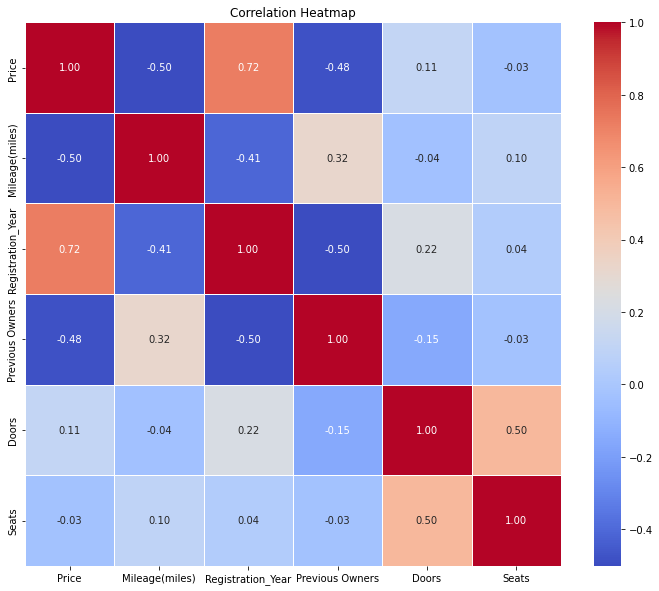

In [14]:
#빠르게 상관관계 파악하기 by heatmap
correlation_matrix = cars.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

#### 빠르게 훓어본 결과:
1. title: 자동차의 모델명
2. price: 가격 -> 종속변수가 될 값
3. Mileage(miles): 주행거리 -> price와 음의 관계(많이 달렸을 수록 쌈) #mile ->km 예정
4. Registration_Year: 자동차 등록 년도 -> price와 양의 관계(최신 차일 수록 비쌈)
5. Previous Ownser: 이전 소유주 몇 명 -> price와의 음의 관계(소유주가 많았을 수록 쌈) <u>Null 값이 많음</u>
6. Fuel type: 6개 종류가 있으며 추후 원 핫 인코딩 사용 예정
7. Body type: 10개 종류가 있으며 추후 원 핫 인코딩 사용 예정 & 그룹화도 가능
8. Engine type: 34개 종류가 있으며 그룹화가 필요해보임
9. Doors: 차 문 수 -> price와 양의 관계(문이 많을 수록 비쌈, 차가 클수록 비쌈)
10. Seats: 좌석 수 -> price와 음의 관계(양의 관계일 것 같은데 이상함)
11. Service history: 과거 자동차 서비스 여부, <u>Null 값 많음</u>


### 데이터 합치기

In [15]:
cars.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [16]:
brand = pd.read_csv('/aiffel/data/brand.csv')
brand.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [17]:
cars['brand'] = cars['title'].str.split(' ', 1).str[0] #title의 앞 텍스트가 브렌드. split 메서드를 활용하여 새로운 column 추가

In [18]:
cars.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL


In [19]:
cars['brand'] = cars['brand'].str.lower() #소문자 변환

In [20]:
cars.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall


In [21]:
brand = brand.rename({'title':'brand'}, axis = 1) #title을 brand로 합쳐 키(key)를 만듦

In [22]:
brand.head()

,brand,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [23]:
cars = cars.merge(brand) #데이터 합치기

In [199]:
cars['Brand'] = cars['Brand'].str.upper() #대문자로 바꾸기

In [29]:
cars.rename(columns={'title': 'Title', 'brand': 'Brand', 'country': 'Country'}, inplace=True)

In [30]:
cars 

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,Country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Skoda,Czech Republic
1,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Skoda,Czech Republic
2,SKODA FABIA,1990,150000,2007,2.0,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full,Skoda,Czech Republic
3,SKODA FABIA,1995,84000,2008,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN,Skoda,Czech Republic
4,SKODA FABIA,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,NaN,Skoda,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,MASERATI QUATTROPORTE,10000,72000,2009,3.0,Petrol,Saloon,4.2L,Automatic,4.0,5.0,Euro 4,Full,Maserati,Italy
3683,SSANGYONG KORANDO,12995,42771,2018,2.0,Diesel,SUV,2.2L,Automatic,5.0,5.0,Euro 6,NaN,Ssangyong,South Korea
3684,SSANGYONG KORANDO,4277,82400,2013,NaN,Diesel,SUV,2.0L,Automatic,5.0,5.0,Euro 5,Full,Ssangyong,South Korea
3685,LAGONDA LG6 ROADSTER,14995,84000,1953,NaN,Petrol,Saloon,2.6L,Manual,4.0,NaN,NaN,NaN,Lagonda,United Kingdom


<h1><span? style="color:blue"> 2. 결측치 처리하기 </span>  

In [31]:
cars.isna().sum()

Title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
Brand                   0
Country                 0
dtype: int64

### Service history 결측치

In [32]:
cars[cars['Service history'].isna()].head(30) #'Service history'의 null 값만의 특성은 찾기 힘듦, 

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,Country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Skoda,Czech Republic
1,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Skoda,Czech Republic
3,SKODA FABIA,1995,84000,2008,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN,Skoda,Czech Republic
4,SKODA FABIA,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,NaN,Skoda,Czech Republic
5,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Skoda,Czech Republic
6,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Skoda,Czech Republic
7,SKODA OCTAVIA,2490,56000,2003,NaN,Petrol,Hatchback,1.8L,Automatic,5.0,5.0,Euro 4,NaN,Skoda,Czech Republic
8,SKODA FABIA,1949,45000,2010,NaN,Petrol,Hatchback,1.2L,Manual,5.0,5.0,Euro 4,NaN,Skoda,Czech Republic
9,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Skoda,Czech Republic
10,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Skoda,Czech Republic


In [33]:
cars['Service history'].isna().mean()
#높은 비율의 null 값이 있음. Service history는 'Unknown'으로 채우기

0.853539462978031

In [34]:
# Service history가 결측치이고 다른 열에도 결측치가 있는 행 제거
null_service_rows = cars[cars['Service history'].isnull()]
null_service_rows

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,Country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Skoda,Czech Republic
1,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Skoda,Czech Republic
3,SKODA FABIA,1995,84000,2008,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN,Skoda,Czech Republic
4,SKODA FABIA,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,NaN,Skoda,Czech Republic
5,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Skoda,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,MARCOS MARTINA,11495,19000,1981,5.0,Petrol,Convertible,2.0L,Manual,NaN,2.0,NaN,NaN,Marcos,United Kingdom
3681,MASERATI GHIBLI,13900,63000,2014,5.0,Diesel,Saloon,3.0L,Automatic,4.0,5.0,Euro 5,NaN,Maserati,Italy
3683,SSANGYONG KORANDO,12995,42771,2018,2.0,Diesel,SUV,2.2L,Automatic,5.0,5.0,Euro 6,NaN,Ssangyong,South Korea
3685,LAGONDA LG6 ROADSTER,14995,84000,1953,NaN,Petrol,Saloon,2.6L,Manual,4.0,NaN,NaN,NaN,Lagonda,United Kingdom


In [35]:
rows_to_drop = cars[cars.isnull().sum(axis=1) > 2].index
rows_to_drop

Int64Index([ 160,  471,  599,  968,  996, 1213, 1561, 1599, 1618, 1651, 1796,
            1800, 1873, 1876, 2051, 2054, 2063, 2141, 2153, 2175, 2177, 2188,
            2214, 2327, 2338, 2373, 2405, 2445, 2473, 2505, 2507, 2592, 2595,
            2664, 2703, 2749, 2762, 2766, 2777, 2808, 2811, 2812, 2813, 2815,
            2819, 2823, 2830, 2831, 2839, 2842, 2847, 2848, 2849, 2850, 2852,
            2858, 2861, 2864, 2865, 2869, 2886, 2888, 2889, 2892, 2893, 2895,
            2898, 2904, 3193, 3270, 3323, 3363, 3450, 3459, 3639, 3642, 3679,
            3685, 3686],
           dtype='int64')

In [36]:
cars.drop(rows_to_drop, inplace=True)

In [37]:
# 'Service history' 행의 결측치를 'Unknown'으로 채우기
cars['Service history'].fillna('Unknown', inplace=True)

In [38]:
cars['Service history'].unique()

array(['Unknown', 'Full'], dtype=object)

In [39]:
cars.isna().sum()

Title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1354
Fuel type               0
Body type               0
Engine                  1
Gearbox                 0
Doors                   1
Seats                   4
Emission Class         10
Service history         0
Brand                   0
Country                 0
dtype: int64

### Previous history 결측치

In [40]:
cars[cars['Previous Owners'].isna()] 

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,Country
3,SKODA FABIA,1995,84000,2008,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,Unknown,Skoda,Czech Republic
7,SKODA OCTAVIA,2490,56000,2003,NaN,Petrol,Hatchback,1.8L,Automatic,5.0,5.0,Euro 4,Unknown,Skoda,Czech Republic
8,SKODA FABIA,1949,45000,2010,NaN,Petrol,Hatchback,1.2L,Manual,5.0,5.0,Euro 4,Unknown,Skoda,Czech Republic
28,SKODA OCTAVIA,1495,172000,2004,NaN,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 3,Unknown,Skoda,Czech Republic
29,SKODA FABIA,3995,75846,2008,NaN,Petrol,Hatchback,1.6L,Automatic,5.0,5.0,Euro 4,Unknown,Skoda,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,ABARTH 595,11699,42237,2018,NaN,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 6,Unknown,Abarth,Italy
3675,SMART FORTWO,5400,39000,2013,NaN,Diesel,Convertible,0.8L,Automatic,2.0,2.0,Euro 5,Unknown,Smart,Germany
3678,SMART FORFOUR,4795,106000,2016,NaN,Petrol,Hatchback,1.0L,Manual,5.0,4.0,Euro 6,Unknown,Smart,Germany
3680,MASERATI GRANTURISMO,16000,66000,2008,NaN,Petrol,Coupe,4.2L,Automatic,2.0,4.0,Euro 4,Full,Maserati,Italy


In [41]:
cars['Previous Owners'].isna().mean() #'Unknown'으로 채우기

0.37527716186252774

In [42]:
cars['Previous Owners'].fillna('Unknown', inplace=True)

In [43]:
cars.isna().sum()

Title                 0
Price                 0
Mileage(miles)        0
Registration_Year     0
Previous Owners       0
Fuel type             0
Body type             0
Engine                1
Gearbox               0
Doors                 1
Seats                 4
Emission Class       10
Service history       0
Brand                 0
Country               0
dtype: int64

### Engine & Doors & Seats 결측치

In [44]:
cars[cars['Engine'].isna()].sort_values(by='Engine').head(30) #결측치가 Engine뿐만 아니라 Doors & Seats에도 있는 것 확인.
# 해당 row 삭제

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,Country
503,VAUXHALL AMPERA,9499,65767,2014,1.0,Petrol Plug-in Hybrid,Hatchback,NaN,Automatic,5.0,4.0,Euro 5,Unknown,Vauxhall,United Kingdom


In [45]:
cars = cars.dropna(subset=['Engine', 'Doors', 'Seats', 'Emission Class']) #삭제 완료

In [46]:
cars

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,Country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Skoda,Czech Republic
1,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Skoda,Czech Republic
2,SKODA FABIA,1990,150000,2007,2.0,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full,Skoda,Czech Republic
3,SKODA FABIA,1995,84000,2008,Unknown,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,Unknown,Skoda,Czech Republic
4,SKODA FABIA,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,Unknown,Skoda,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,MASERATI GRANTURISMO,16000,66000,2008,Unknown,Petrol,Coupe,4.2L,Automatic,2.0,4.0,Euro 4,Full,Maserati,Italy
3681,MASERATI GHIBLI,13900,63000,2014,5.0,Diesel,Saloon,3.0L,Automatic,4.0,5.0,Euro 5,Unknown,Maserati,Italy
3682,MASERATI QUATTROPORTE,10000,72000,2009,3.0,Petrol,Saloon,4.2L,Automatic,4.0,5.0,Euro 4,Full,Maserati,Italy
3683,SSANGYONG KORANDO,12995,42771,2018,2.0,Diesel,SUV,2.2L,Automatic,5.0,5.0,Euro 6,Unknown,Ssangyong,South Korea


<h1><span? style="color:blue"> 3. 이상치 처리하기 </span>  

In [47]:
cars.describe()

,Price,Mileage(miles),Registration_Year,Doors,Seats
count,3593.000000,3.593000e+03,3593.000000,3593.000000,3593.000000
mean,5791.841637,8.151118e+04,2011.953799,4.318675,4.898692
std,4515.066997,3.954136e+04,4.741254,0.986281,0.575368
min,400.000000,1.000000e+00,1993.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,3.000000,5.000000
50%,3999.000000,8.000000e+04,2012.000000,5.000000,5.000000
75%,7999.000000,1.030990e+05,2016.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2023.000000,5.000000,7.000000


Text(0.5, 1.0, 'Mileage vs Doors')

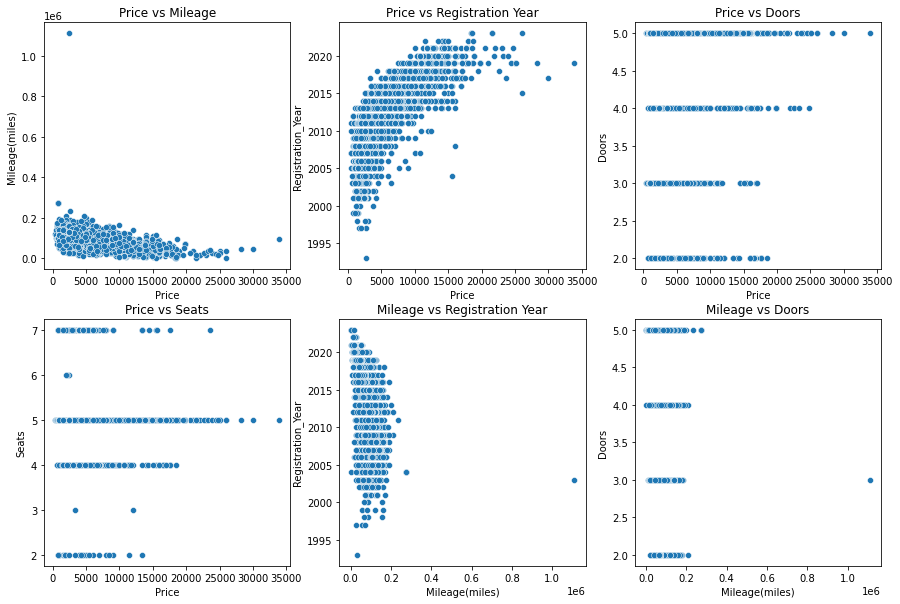

In [48]:
# Scatter plot 그리기
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x='Price', y='Mileage(miles)', data=cars)
plt.title('Price vs Mileage')

plt.subplot(2, 3, 2)
sns.scatterplot(x='Price', y='Registration_Year', data=cars)
plt.title('Price vs Registration Year')

plt.subplot(2, 3, 3)
sns.scatterplot(x='Price', y='Doors', data=cars)
plt.title('Price vs Doors')

plt.subplot(2, 3, 4)
sns.scatterplot(x='Price', y='Seats', data=cars)
plt.title('Price vs Seats')

plt.subplot(2, 3, 5)
sns.scatterplot(x='Mileage(miles)', y='Registration_Year', data=cars)
plt.title('Mileage vs Registration Year')

plt.subplot(2, 3, 6)
sns.scatterplot(x='Mileage(miles)', y='Doors', data=cars)
plt.title('Mileage vs Doors')

In [49]:
cars.sort_values(by='Mileage(miles)', ascending = False)

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,Country
2173,VOLKSWAGEN BEETLE,2495,1110100,2003,4.0,Petrol,Hatchback,2.0L,Automatic,3.0,4.0,Euro 4,Unknown,Volkswagen,Germany
1231,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,Unknown,Volvo,Sweden
1236,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,Unknown,Volvo,Sweden
1235,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,Unknown,Volvo,Sweden
1223,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,Unknown,Volvo,Sweden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,MG MG HS,21495,1048,2023,1.0,Petrol,SUV,1.5L,Automatic,5.0,5.0,Euro 6,Unknown,Mg,United Kingdom
2721,SEAT ATECA,25995,222,2023,Unknown,Petrol,SUV,1.5L,Manual,5.0,5.0,Euro 6,Unknown,Seat,Spain
2475,MG ZT,15500,6,2004,4.0,Petrol,Saloon,1.8L,Manual,4.0,5.0,Euro 3,Unknown,Mg,United Kingdom
2477,MG MG ZS,18365,1,2023,Unknown,Petrol,SUV,1.5L,Manual,5.0,5.0,Euro 6,Unknown,Mg,United Kingdom


In [50]:
cars = cars.drop(2173) #삭제

In [51]:
cars.sort_values(by='Mileage(miles)', ascending = False).head() #삭제완료

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,Country
1227,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,Unknown,Volvo,Sweden
1234,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,Unknown,Volvo,Sweden
1231,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,Unknown,Volvo,Sweden
1236,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,Unknown,Volvo,Sweden
1223,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,Unknown,Volvo,Sweden


Text(0.5, 1.0, 'Mileage vs Doors')

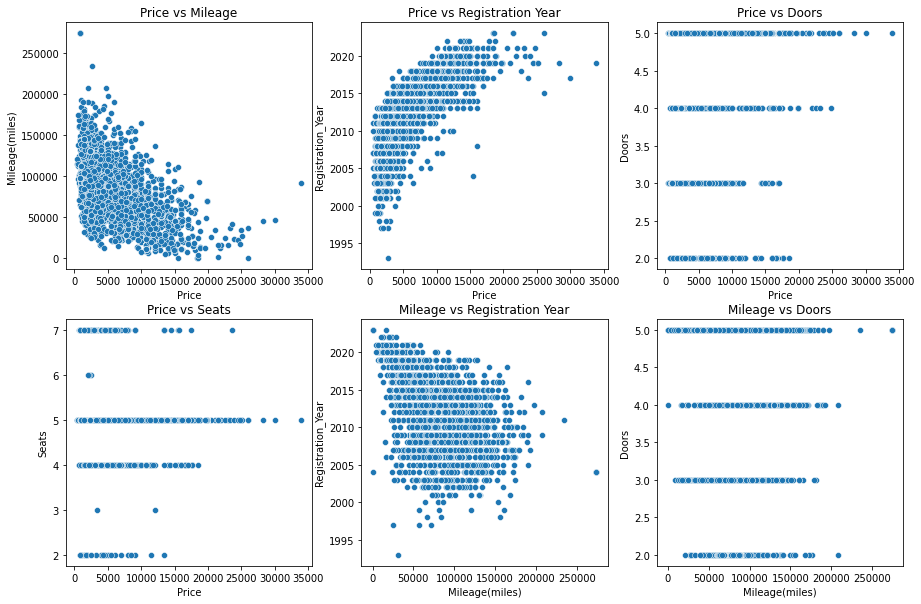

In [52]:
#다시 그려보기
# Scatter plot 그리기
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x='Price', y='Mileage(miles)', data=cars)
plt.title('Price vs Mileage')

plt.subplot(2, 3, 2)
sns.scatterplot(x='Price', y='Registration_Year', data=cars)
plt.title('Price vs Registration Year')

plt.subplot(2, 3, 3)
sns.scatterplot(x='Price', y='Doors', data=cars)
plt.title('Price vs Doors')

plt.subplot(2, 3, 4)
sns.scatterplot(x='Price', y='Seats', data=cars)
plt.title('Price vs Seats')

plt.subplot(2, 3, 5)
sns.scatterplot(x='Mileage(miles)', y='Registration_Year', data=cars)
plt.title('Mileage vs Registration Year')

plt.subplot(2, 3, 6)
sns.scatterplot(x='Mileage(miles)', y='Doors', data=cars)
plt.title('Mileage vs Doors')

<h1><span? style="color:blue"> 4. 중복값 처리하기 </span>  

In [53]:
cars[cars.duplicated()] #중복값 800개

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,Country
1,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Skoda,Czech Republic
5,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Skoda,Czech Republic
6,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Skoda,Czech Republic
9,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Skoda,Czech Republic
10,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Skoda,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,SUBARU IMPREZA,2395,130100,2001,5.0,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 2,Unknown,Subaru,Japan
3659,SUBARU IMPREZA,2395,130100,2001,5.0,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 2,Unknown,Subaru,Japan
3660,SUBARU IMPREZA,2395,130100,2001,5.0,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 2,Unknown,Subaru,Japan
3661,SUBARU IMPREZA,2395,130100,2001,5.0,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 2,Unknown,Subaru,Japan


In [54]:
cars.drop_duplicates(inplace=True) #중복값 800개 제거

In [55]:
cars

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,Country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Skoda,Czech Republic
2,SKODA FABIA,1990,150000,2007,2.0,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full,Skoda,Czech Republic
3,SKODA FABIA,1995,84000,2008,Unknown,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,Unknown,Skoda,Czech Republic
4,SKODA FABIA,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,Unknown,Skoda,Czech Republic
7,SKODA OCTAVIA,2490,56000,2003,Unknown,Petrol,Hatchback,1.8L,Automatic,5.0,5.0,Euro 4,Unknown,Skoda,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,MASERATI GRANTURISMO,16000,66000,2008,Unknown,Petrol,Coupe,4.2L,Automatic,2.0,4.0,Euro 4,Full,Maserati,Italy
3681,MASERATI GHIBLI,13900,63000,2014,5.0,Diesel,Saloon,3.0L,Automatic,4.0,5.0,Euro 5,Unknown,Maserati,Italy
3682,MASERATI QUATTROPORTE,10000,72000,2009,3.0,Petrol,Saloon,4.2L,Automatic,4.0,5.0,Euro 4,Full,Maserati,Italy
3683,SSANGYONG KORANDO,12995,42771,2018,2.0,Diesel,SUV,2.2L,Automatic,5.0,5.0,Euro 6,Unknown,Ssangyong,South Korea


In [56]:
cars[cars.duplicated()] #삭제 완료

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,Country


Text(0.5, 1.0, 'Mileage vs Doors')

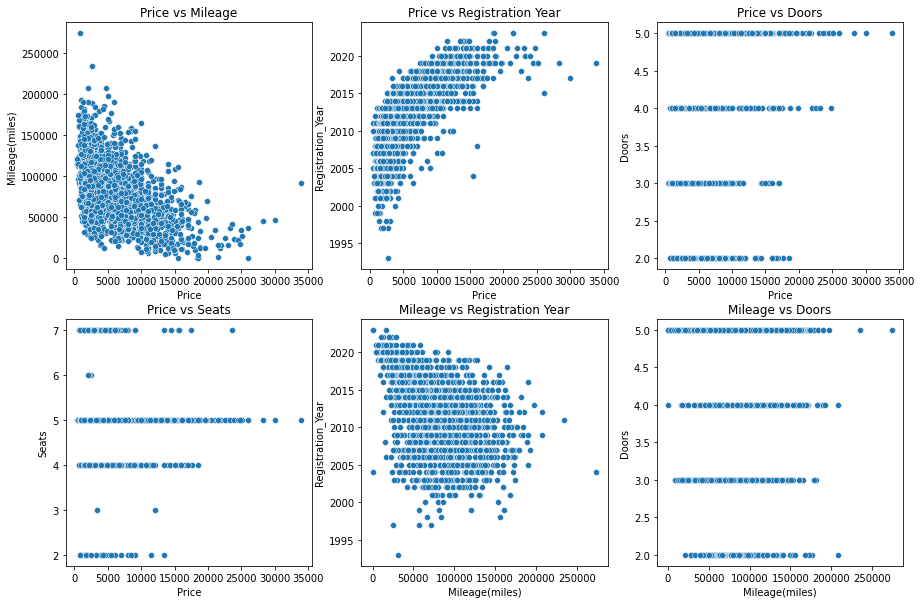

In [57]:
#다시 그려보기
# Scatter plot 그리기
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x='Price', y='Mileage(miles)', data=cars)
plt.title('Price vs Mileage')

plt.subplot(2, 3, 2)
sns.scatterplot(x='Price', y='Registration_Year', data=cars)
plt.title('Price vs Registration Year')

plt.subplot(2, 3, 3)
sns.scatterplot(x='Price', y='Doors', data=cars)
plt.title('Price vs Doors')

plt.subplot(2, 3, 4)
sns.scatterplot(x='Price', y='Seats', data=cars)
plt.title('Price vs Seats')

plt.subplot(2, 3, 5)
sns.scatterplot(x='Mileage(miles)', y='Registration_Year', data=cars)
plt.title('Mileage vs Registration Year')

plt.subplot(2, 3, 6)
sns.scatterplot(x='Mileage(miles)', y='Doors', data=cars)
plt.title('Mileage vs Doors')

<h1><span? style="color:blue"> 5. 집계 및 그룹화, 피벗 테이블 사용하여 요약된 정보 출력 </span>  

<h4> Registration Year, Fuel type, Body type, Engine, Gearbox, brand, country 별 평균 가격

In [48]:
cars.head()

,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,brand,country
0,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,skoda,Czech Republic
2,SKODA FABIA,1990,150000,2007,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,skoda,Czech Republic
3,SKODA FABIA,1995,84000,2008,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,skoda,Czech Republic
4,SKODA FABIA,2495,124138,2011,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,skoda,Czech Republic
7,SKODA OCTAVIA,2490,56000,2003,Petrol,Hatchback,1.8L,Automatic,5.0,5.0,Euro 4,skoda,Czech Republic


In [58]:
cars_year = cars.groupby(['Registration_Year']).mean().reset_index()
cars_year

,Registration_Year,Price,Mileage(miles),Doors,Seats
0,1993,2750.000000,31000.000000,3.000000,5.000000
1,1997,2094.666667,51461.666667,4.666667,5.000000
2,1998,2291.666667,102365.666667,2.666667,4.333333
3,1999,1147.000000,104945.750000,4.250000,5.000000
4,2000,2008.250000,96059.750000,3.000000,4.500000
5,2001,2180.000000,99533.733333,4.000000,4.733333
6,2002,1859.166667,92157.566667,4.333333,4.866667
7,2003,1944.019608,93330.803922,3.941176,4.627451
8,2004,2256.590909,101498.984848,4.015152,4.742424
9,2005,2353.974684,100765.620253,4.063291,4.797468


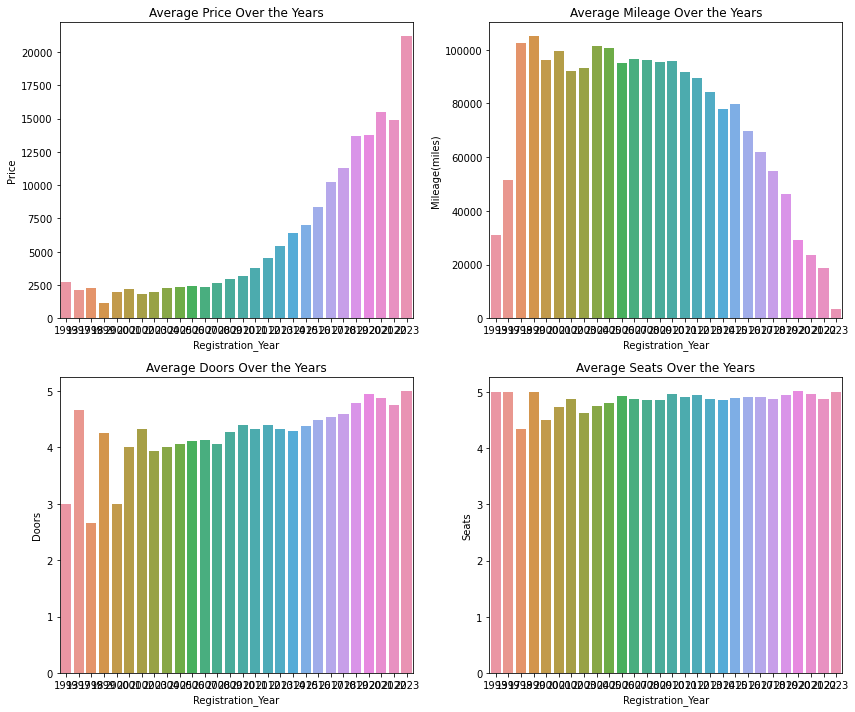

In [72]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='Registration_Year', y='Price', data=cars_year)
plt.title('Average Price Over the Years')

plt.subplot(2, 2, 2)
sns.barplot(x='Registration_Year', y='Mileage(miles)', data=cars_year)
plt.title('Average Mileage Over the Years')

plt.subplot(2, 2, 3)
sns.barplot(x='Registration_Year', y='Doors', data=cars_year)
plt.title('Average Doors Over the Years')

plt.subplot(2, 2, 4)
sns.barplot(x='Registration_Year', y='Seats', data=cars_year)
plt.title('Average Seats Over the Years')

plt.tight_layout()
plt.show()

#### price는 registration_year가 올라 갈 수록 높아짐. 하지만 2022년이나 2020년 같이 내려가는 경우도 있음
#### mileage 점점 내려가는 것을 알 수 있음
#### 나머지는 유의미한 관계 없음. 다만 90년대는 문의 수가 적음

In [63]:
cars.groupby('Fuel type').mean()

,Price,Mileage(miles),Registration_Year,Doors,Seats
Fuel type,,,,,
Diesel,6190.223565,95799.727090,2012.361531,4.526687,5.043303
Diesel Hybrid,23220.000000,36795.000000,2020.000000,4.000000,5.000000
Petrol,4777.064081,77049.399101,2010.878583,4.215289,4.803822
Petrol Hybrid,9176.714286,75827.285714,2013.714286,4.500000,4.785714
Petrol Plug-in Hybrid,15832.000000,83079.800000,2018.000000,4.200000,5.000000


#### 확실히 Hybrid 계열 차들이 금액이 높고 Registration Year가 최신임

In [74]:
cars_country = cars.groupby(['Country']).mean().reset_index()
cars_country

,Country,Price,Mileage(miles),Registration_Year,Doors,Seats
0,Czech Republic,5116.723404,88690.489362,2011.553191,4.957447,4.978723
1,France,5074.028947,73046.750000,2012.231579,4.439474,4.923684
2,Germany,6393.016248,94832.017725,2010.833087,4.007386,4.802068
3,Italy,4416.542056,71025.644860,2011.570093,3.551402,4.383178
4,Japan,4637.466667,88009.308889,2010.193333,4.631111,4.977778
5,Malaysia,1342.500000,71085.000000,2009.000000,5.000000,4.000000
6,Romania,7439.571429,39983.071429,2016.857143,5.000000,5.000000
7,South Korea,6079.920863,71228.151079,2013.208633,4.748201,4.942446
8,Spain,5201.891304,80549.282609,2012.152174,4.152174,5.000000
9,Sweden,4014.743590,109782.461538,2009.589744,4.282051,4.923077


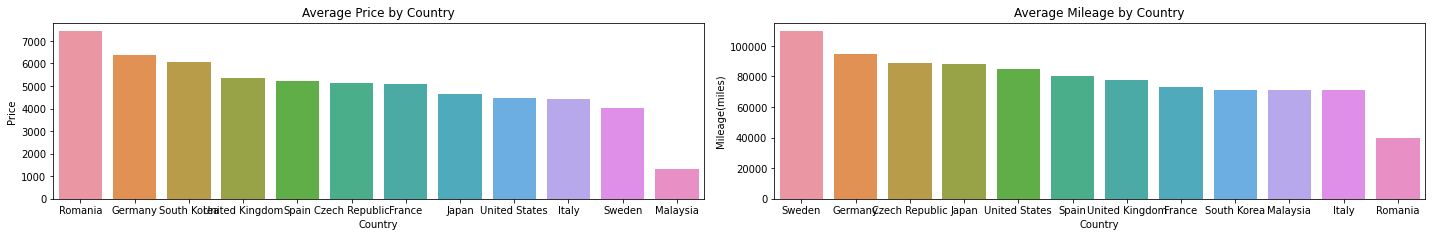

In [87]:
plt.figure(figsize=(20, 6))


plt.subplot(2, 2, 1)
sns.barplot(x='Country', y='Price', data=cars_country.sort_values(by = 'Price', ascending = False))
plt.title('Average Price by Country')

plt.subplot(2, 2, 2)
sns.barplot(x='Country', y='Mileage(miles)', data=cars_country.sort_values(by = 'Mileage(miles)', ascending = False))
plt.title('Average Mileage by Country')

plt.tight_layout()
plt.show()

#### 루마니아 차량이 평균 금액이 제일 높음. 그다음 독일 한국 순임. 한국차는 외국에서 비싸게 파는 전략을 사용하는 듯
#### 평균 가격이 하위권인 스웨덴이 주행거리는 제일 높음. 가장 오래 쓰다가 파는 듯

In [91]:
cars.groupby(['Country','Brand']).mean().reset_index()

,Country,Brand,Price,Mileage(miles),Registration_Year,Doors,Seats
0,Czech Republic,Skoda,5116.723404,88690.489362,2011.553191,4.957447,4.978723
1,France,Citroen,4657.692308,78591.483516,2012.153846,4.681319,4.912088
2,France,Ds,14293.833333,47101.000000,2018.333333,4.166667,5.000000
3,France,Peugeot,5013.091463,71587.146341,2011.987805,4.304878,4.804878
4,France,Renault,5011.521008,72126.403361,2012.319328,4.453782,5.092437
5,Germany,Audi,6713.555556,99782.384615,2011.111111,3.957265,4.888889
6,Germany,Bmw,6653.795556,97180.413333,2010.648889,3.911111,4.782222
7,Germany,Mercedes-benz,7059.240876,94762.700730,2010.978102,3.759124,4.635036
8,Germany,Porsche,4802.500000,125000.000000,2007.000000,5.000000,5.000000
9,Germany,Smart,5621.250000,57953.500000,2015.250000,4.250000,3.500000


In [92]:
cars.groupby(['Fuel type','Engine']).mean().head(10)

Price  Mileage(miles)  Registration_Year     Doors  \
Fuel type Engine                                                             
Diesel    0.8L    5400.000000    39000.000000        2013.000000  2.000000   
          1.1L    6750.000000    42250.000000        2015.000000  5.000000   
          1.2L    2715.000000   115360.000000        2012.000000  4.333333   
          1.3L    2774.437500    84155.375000        2011.437500  4.500000   
          1.4L    4187.500000    88697.807692        2011.846154  4.846154   
          1.5L    7444.285714    79138.619048        2014.595238  4.761905   
          1.6L    5379.731707    90709.658537        2013.414634  4.819512   
          1.7L    5017.606061    87894.090909        2012.333333  4.818182   
          1.8L    3825.000000    93821.000000        2010.583333  5.000000   
          1.9L    2183.689655   112876.172414        2006.689655  4.551724   

                     Seats  
Fuel type Engine            
Diesel    0.8L    2.000000  
          1.1L    5.000000  
          1.2L    5.000000  
          1.3L    4.937500  
          1.4L    4.961538  
          1.5L    5.055556  
          1.6L    5.082927  
          1.7L    5.000000  
          1.8L    5.000000  
          1.9L    5.448276

In [93]:
price_stats_by_year = cars.groupby('Registration_Year')['Price'].agg(['mean', 'max', 'min']).reset_index()
price_stats_by_year

,Registration_Year,mean,max,min
0,1993,2750.000000,2750,2750
1,1997,2094.666667,2695,1599
2,1998,2291.666667,3000,1400
3,1999,1147.000000,1449,750
4,2000,2008.250000,3699,1195
5,2001,2180.000000,4195,700
6,2002,1859.166667,3995,1000
7,2003,1944.019608,6499,595
8,2004,2256.590909,15500,640
9,2005,2353.974684,9000,450


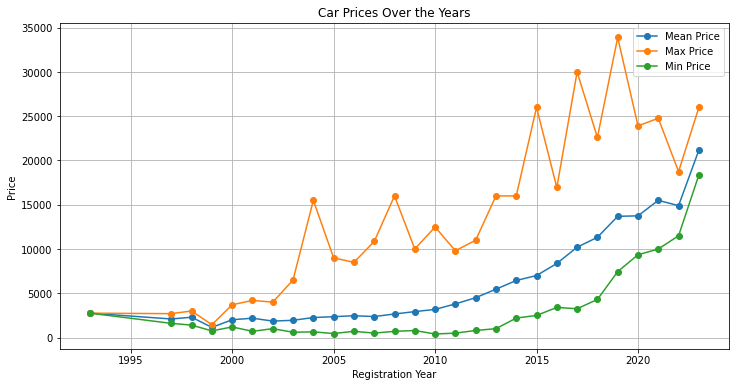

In [94]:
# Plotting the data
plt.figure(figsize=(12, 6))

plt.plot(price_stats_by_year['Registration_Year'], price_stats_by_year['mean'], label='Mean Price', marker='o')
plt.plot(price_stats_by_year['Registration_Year'], price_stats_by_year['max'], label='Max Price', marker='o')
plt.plot(price_stats_by_year['Registration_Year'], price_stats_by_year['min'], label='Min Price', marker='o')

plt.title('Car Prices Over the Years')
plt.xlabel('Registration Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
cars.groupby(['Country','Brand']).mean().reset_index()

,Country,Brand,Price,Mileage(miles),Registration_Year,Doors,Seats
0,Czech Republic,Skoda,5116.723404,88690.489362,2011.553191,4.957447,4.978723
1,France,Citroen,4657.692308,78591.483516,2012.153846,4.681319,4.912088
2,France,Ds,14293.833333,47101.000000,2018.333333,4.166667,5.000000
3,France,Peugeot,5013.091463,71587.146341,2011.987805,4.304878,4.804878
4,France,Renault,5011.521008,72126.403361,2012.319328,4.453782,5.092437
5,Germany,Audi,6713.555556,99782.384615,2011.111111,3.957265,4.888889
6,Germany,Bmw,6653.795556,97180.413333,2010.648889,3.911111,4.782222
7,Germany,Mercedes-benz,7059.240876,94762.700730,2010.978102,3.759124,4.635036
8,Germany,Porsche,4802.500000,125000.000000,2007.000000,5.000000,5.000000
9,Germany,Smart,5621.250000,57953.500000,2015.250000,4.250000,3.500000


In [85]:
#피봇 테이블 만들기, 국가와 생산 년도에 따른 평균 가격
pd.pivot_table(cars, index = 'Registration_Year', columns = 'country', values = 'Price')

country,Czech Republic,France,Germany,Italy,Japan,Malaysia,Romania,South Korea,Spain,Sweden,United Kingdom,United States
Registration_Year,,,,,,,,,,,,
1993,NaN,NaN,2750.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,2695.000000,NaN,NaN,1794.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,3000.000000,NaN,NaN,2475.000000,NaN,NaN,NaN,NaN,NaN,NaN,1400.000000
1999,NaN,NaN,1449.000000,NaN,1069.500000,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN
2000,NaN,3699.000000,1569.500000,NaN,1195.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,999.000000,NaN,2056.166667,NaN,2844.833333,NaN,NaN,NaN,700.000000,NaN,1595.000000,NaN
2002,NaN,1728.000000,2341.636364,NaN,1699.800000,NaN,NaN,NaN,NaN,NaN,1300.000000,1308.750000
2003,2492.500000,2831.333333,2160.545455,NaN,2025.727273,NaN,NaN,992.500000,2495.000000,2149.500000,1855.900000,1364.333333
2004,1095.000000,2506.600000,2734.909091,1405.000000,1792.312500,NaN,NaN,NaN,NaN,795.000000,3035.400000,1433.000000


<h1><span? style="color:blue"> 6. 원-핫 인코딩 </span>  

<h3> pd.get_dummies()

In [191]:
cars.info() #문자열 columns 많음, 원-핫 인코딩 필요. 현재 총 14개의 column.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2792 entries, 0 to 3684
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2792 non-null   object 
 1   Price              2792 non-null   int64  
 2   Mileage(miles)     2792 non-null   int64  
 3   Registration_Year  2792 non-null   int64  
 4   Previous Owners    2792 non-null   object 
 5   Fuel type          2792 non-null   object 
 6   Body type          2792 non-null   object 
 7   Engine             2792 non-null   object 
 8   Gearbox            2792 non-null   object 
 9   Doors              2792 non-null   float64
 10  Seats              2792 non-null   float64
 11  Emission Class     2792 non-null   object 
 12  Service history    2792 non-null   object 
 13  Brand              2792 non-null   object 
 14  Country            2792 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 349.0+ KB


In [192]:
cars.nunique() # 이중 Title, Previous Onwers, Fuel type, Body type, Engine, Gearbox, Emission Class, Brand, Country 해결 필요

Title                 423
Price                 861
Mileage(miles)       1537
Registration_Year      28
Previous Owners        10
Fuel type               5
Body type               9
Engine                 10
Gearbox                 2
Doors                   4
Seats                   6
Emission Class          5
Service history         2
Brand                  45
Country                12
dtype: int64

In [197]:
pd.set_option('display.max_rows', None)
print(cars['Title'].value_counts())

VAUXHALL CORSA                                       156
FORD FIESTA                                          111
VAUXHALL ASTRA                                       103
FORD FOCUS                                            92
BMW 3 SERIES                                          92
MINI HATCH                                            60
RENAULT CLIO                                          58
BMW 1 SERIES                                          55
VOLKSWAGEN POLO                                       53
VOLKSWAGEN GOLF                                       52
MERCEDES-BENZ C CLASS                                 48
AUDI A3                                               42
HONDA CIVIC                                           41
NISSAN QASHQAI                                        41
FIAT 500                                              39
TOYOTA YARIS                                          38
SEAT IBIZA                                            33
VAUXHALL INSIGNIA              

In [114]:
cars['Emission Class'].value_counts()

Euro 5    1096
Euro 4     865
Euro 6     683
Euro 3     131
Euro 2      16
Euro 1       1
Name: Emission Class, dtype: int64

In [200]:
# TEST
#'Title', 'Previous Owners'Engine', 'Emission Class','Brand','Country'에 너무 많은 고유값이 있음
# 특정 비율을 정해 그에 해당하는 값들은 'others'로 replace

threshold_percentage = 3.0  
columns_to_process = ['Title', 'Previous Owners', 'Engine', 'Emission Class','Brand','Country']
cars_test = cars.copy()

for column in columns_to_process:
    value_counts = cars_test[column].value_counts(normalize=True) * 100
    values_to_replace = value_counts[value_counts < threshold_percentage].index
    cars_test[column] = cars_test[column].replace(values_to_replace, 'Others')

In [203]:
cars_test.head()

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,Country
0,Others,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Others,Others
2,Others,1990,150000,2007,2.0,Diesel,Hatchback,other,Manual,5.0,5.0,Euro 4,Full,Others,Others
3,Others,1995,84000,2008,Unknown,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,Unknown,Others,Others
4,Others,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,Unknown,Others,Others
7,Others,2490,56000,2003,Unknown,Petrol,Hatchback,1.8L,Automatic,5.0,5.0,Euro 4,Unknown,Others,Others


In [204]:
cars_test.nunique() #고유값이 줄어듦. 

Title                   6
Price                 861
Mileage(miles)       1537
Registration_Year      28
Previous Owners         7
Fuel type               5
Body type               9
Engine                 10
Gearbox                 2
Doors                   4
Seats                   6
Emission Class          5
Service history         2
Brand                  13
Country                 8
dtype: int64

In [207]:
cars_test['Title'].value_counts() 
#others가 압도록적으로 높음. 아예 column 자체를 살제할지, 
#아니면 others를 제외한 모델링을 하면 되는지 고민

Others            2238
VAUXHALL CORSA     156
FORD FIESTA        111
VAUXHALL ASTRA     103
FORD FOCUS          92
BMW 3 SERIES        92
Name: Title, dtype: int64

In [208]:
cars_test['Brand'].value_counts() #위와 동일

Others           713
VAUXHALL         390
FORD             320
BMW              225
VOLKSWAGEN       192
PEUGEOT          164
MERCEDES-BENZ    137
NISSAN           129
RENAULT          119
AUDI             117
TOYOTA            99
HONDA             96
CITROEN           91
Name: Brand, dtype: int64

In [210]:
cars_test['Country'].value_counts() #적합하게 나온 듯

Germany           677
United Kingdom    545
Japan             450
France            380
United States     346
Others            148
South Korea       139
Italy             107
Name: Country, dtype: int64

In [222]:
#'Title', 'Previous Owners'Engine', 'Emission Class','Brand','Country'에 너무 많은 고유값이 있음
# 특정 비율을 정해 그에 해당하는 값들은 'others'로 replace

threshold_percentage = 3.0  
columns_to_process = ['Title', 'Previous Owners', 'Engine', 'Emission Class','Brand','Country']
cars_test = cars.copy()

for column in columns_to_process:
    value_counts = cars[column].value_counts(normalize=True) * 100
    values_to_replace = value_counts[value_counts < threshold_percentage].index
    cars[column] = cars[column].replace(values_to_replace, 'Others')

In [223]:
cars.head()

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,Country
0,Others,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Others,Others
2,Others,1990,150000,2007,2.0,Diesel,Hatchback,other,Manual,5.0,5.0,Euro 4,Full,Others,Others
3,Others,1995,84000,2008,Unknown,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,Unknown,Others,Others
4,Others,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,Unknown,Others,Others
7,Others,2490,56000,2003,Unknown,Petrol,Hatchback,1.8L,Automatic,5.0,5.0,Euro 4,Unknown,Others,Others


In [227]:
cars = pd.get_dummies(cars, columns = ['Title', 'Fuel type', 'Body type', 'Gearbox', 'Previous Owners', 'Engine', 'Emission Class','Brand','Country', 'Service history'], drop_first = True)

In [228]:
cars.info() #총 61개의 Column으로 이루어진 원 핫 인코딩 완료

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2792 entries, 0 to 3684
Data columns (total 62 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Price                            2792 non-null   int64  
 1   Mileage(miles)                   2792 non-null   int64  
 2   Registration_Year                2792 non-null   int64  
 3   Doors                            2792 non-null   float64
 4   Seats                            2792 non-null   float64
 5   Title_FORD FIESTA                2792 non-null   uint8  
 6   Title_FORD FOCUS                 2792 non-null   uint8  
 7   Title_Others                     2792 non-null   uint8  
 8   Title_VAUXHALL ASTRA             2792 non-null   uint8  
 9   Title_VAUXHALL CORSA             2792 non-null   uint8  
 10  Fuel type_Diesel Hybrid          2792 non-null   uint8  
 11  Fuel type_Petrol                 2792 non-null   uint8  
 12  Fuel type_Petrol Hyb

In [215]:
pd.reset_option('display.max_rows')

In [229]:
cars.head()

,Price,Mileage(miles),Registration_Year,Doors,Seats,Title_FORD FIESTA,Title_FORD FOCUS,Title_Others,Title_VAUXHALL ASTRA,Title_VAUXHALL CORSA,Fuel type_Diesel Hybrid,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Previous Owners_2.0,Previous Owners_3.0,...,Engine_other,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6,Emission Class_Others,Brand_BMW,Brand_CITROEN,Brand_FORD,Brand_HONDA,Brand_MERCEDES-BENZ,Brand_NISSAN,Brand_Others,Brand_PEUGEOT,Brand_RENAULT,Brand_TOYOTA,Brand_VAUXHALL,Brand_VOLKSWAGEN,Country_Germany,Country_Italy,Country_Japan,Country_Others,Country_South Korea,Country_United Kingdom,Country_United States,Service history_Unknown
0,6900,70189,2016,5.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1990,150000,2007,5.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1995,84000,2008,5.0,5.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,2495,124138,2011,5.0,5.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
7,2490,56000,2003,5.0,5.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


<h1><span? style="color:blue"> 7. 스케일링 </span>

<h3> StandarsScalar, RobustScaler, MinMaxScaler

In [141]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [142]:
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [230]:
ss.fit(cars)

StandardScaler()

In [235]:
cars.columns

Index(['Price', 'Mileage(miles)', 'Registration_Year', 'Doors', 'Seats',
       'Title_FORD FIESTA', 'Title_FORD FOCUS', 'Title_Others',
       'Title_VAUXHALL ASTRA', 'Title_VAUXHALL CORSA',
       'Fuel type_Diesel Hybrid', 'Fuel type_Petrol',
       'Fuel type_Petrol Hybrid', 'Fuel type_Petrol Plug-in Hybrid',
       'Body type_Convertible', 'Body type_Coupe', 'Body type_Estate',
       'Body type_Hatchback', 'Body type_MPV', 'Body type_Pickup',
       'Body type_SUV', 'Body type_Saloon', 'Gearbox_Manual',
       'Previous Owners_2.0', 'Previous Owners_3.0', 'Previous Owners_4.0',
       'Previous Owners_5.0', 'Previous Owners_Others',
       'Previous Owners_Unknown', 'Engine_1.2L', 'Engine_1.3L', 'Engine_1.4L',
       'Engine_1.5L', 'Engine_1.6L', 'Engine_1.8L', 'Engine_2.0L',
       'Engine_Others', 'Engine_other', 'Emission Class_Euro 4',
       'Emission Class_Euro 5', 'Emission Class_Euro 6',
       'Emission Class_Others', 'Brand_BMW', 'Brand_CITROEN', 'Brand_FORD',
       'B

In [237]:
ss_df = pd.DataFrame(ss.transform(cars), columns = [cars.columns])

In [231]:
rs.fit(cars)

RobustScaler()

In [238]:
rs_df = pd.DataFrame(rs.transform(cars), columns = [cars.columns])

In [240]:
mm.fit(cars)

MinMaxScaler()

In [241]:
mm_df = pd.DataFrame(mm.transform(cars), columns = [cars.columns])

In [242]:
ss_df.head() 

,Price,Mileage(miles),Registration_Year,Doors,Seats,Title_FORD FIESTA,Title_FORD FOCUS,Title_Others,Title_VAUXHALL ASTRA,Title_VAUXHALL CORSA,Fuel type_Diesel Hybrid,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Previous Owners_2.0,Previous Owners_3.0,...,Engine_other,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6,Emission Class_Others,Brand_BMW,Brand_CITROEN,Brand_FORD,Brand_HONDA,Brand_MERCEDES-BENZ,Brand_NISSAN,Brand_Others,Brand_PEUGEOT,Brand_RENAULT,Brand_TOYOTA,Brand_VAUXHALL,Brand_VOLKSWAGEN,Country_Germany,Country_Italy,Country_Japan,Country_Others,Country_South Korea,Country_United Kingdom,Country_United States,Service history_Unknown
0,0.379899,-0.391486,1.015114,0.686446,0.189056,-0.203476,-0.184592,0.497536,-0.195715,-0.243271,-0.018929,-1.325206,-0.07099,-0.042356,-0.180401,-0.195715,-0.210068,0.818448,-0.220095,-0.032797,-0.397524,-0.345019,0.537045,-0.484615,2.356691,...,-0.364852,-0.669988,-0.803882,1.757227,-0.07827,-0.296059,-0.183552,-0.359791,-0.188702,-0.227158,-0.220095,1.707586,-0.24981,-0.210996,-0.191734,-0.402945,-0.271746,-0.565769,-0.199627,-0.438342,4.226685,-0.228896,-0.492489,-0.376106,0.432521
1,-0.806781,1.919635,-0.986752,0.686446,0.189056,-0.203476,-0.184592,0.497536,-0.195715,-0.243271,-0.018929,-1.325206,-0.07099,-0.042356,-0.180401,-0.195715,-0.210068,0.818448,-0.220095,-0.032797,-0.397524,-0.345019,0.537045,2.063493,-0.424324,...,2.740838,1.492563,-0.803882,-0.569078,-0.07827,-0.296059,-0.183552,-0.359791,-0.188702,-0.227158,-0.220095,1.707586,-0.24981,-0.210996,-0.191734,-0.402945,-0.271746,-0.565769,-0.199627,-0.438342,4.226685,-0.228896,-0.492489,-0.376106,-2.312024
2,-0.805573,0.008445,-0.764323,0.686446,0.189056,-0.203476,-0.184592,0.497536,-0.195715,-0.243271,-0.018929,0.754600,-0.07099,-0.042356,-0.180401,-0.195715,-0.210068,0.818448,-0.220095,-0.032797,-0.397524,-0.345019,0.537045,-0.484615,-0.424324,...,-0.364852,1.492563,-0.803882,-0.569078,-0.07827,-0.296059,-0.183552,-0.359791,-0.188702,-0.227158,-0.220095,1.707586,-0.24981,-0.210996,-0.191734,-0.402945,-0.271746,-0.565769,-0.199627,-0.438342,4.226685,-0.228896,-0.492489,-0.376106,0.432521
3,-0.684730,1.170738,-0.097034,0.686446,0.189056,-0.203476,-0.184592,0.497536,-0.195715,-0.243271,-0.018929,0.754600,-0.07099,-0.042356,-0.180401,-0.195715,-0.210068,0.818448,-0.220095,-0.032797,-0.397524,-0.345019,-1.862042,-0.484615,2.356691,...,-0.364852,-0.669988,1.243964,-0.569078,-0.07827,-0.296059,-0.183552,-0.359791,-0.188702,-0.227158,-0.220095,1.707586,-0.24981,-0.210996,-0.191734,-0.402945,-0.271746,-0.565769,-0.199627,-0.438342,4.226685,-0.228896,-0.492489,-0.376106,0.432521
4,-0.685938,-0.802363,-1.876470,0.686446,0.189056,-0.203476,-0.184592,0.497536,-0.195715,-0.243271,-0.018929,0.754600,-0.07099,-0.042356,-0.180401,-0.195715,-0.210068,0.818448,-0.220095,-0.032797,-0.397524,-0.345019,-1.862042,-0.484615,-0.424324,...,-0.364852,1.492563,-0.803882,-0.569078,-0.07827,-0.296059,-0.183552,-0.359791,-0.188702,-0.227158,-0.220095,1.707586,-0.24981,-0.210996,-0.191734,-0.402945,-0.271746,-0.565769,-0.199627,-0.438342,4.226685,-0.228896,-0.492489,-0.376106,0.432521


In [243]:
rs_df.head() 

,Price,Mileage(miles),Registration_Year,Doors,Seats,Title_FORD FIESTA,Title_FORD FOCUS,Title_Others,Title_VAUXHALL ASTRA,Title_VAUXHALL CORSA,Fuel type_Diesel Hybrid,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Previous Owners_2.0,Previous Owners_3.0,...,Engine_other,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6,Emission Class_Others,Brand_BMW,Brand_CITROEN,Brand_FORD,Brand_HONDA,Brand_MERCEDES-BENZ,Brand_NISSAN,Brand_Others,Brand_PEUGEOT,Brand_RENAULT,Brand_TOYOTA,Brand_VAUXHALL,Brand_VOLKSWAGEN,Country_Germany,Country_Italy,Country_Japan,Country_Others,Country_South Korea,Country_United Kingdom,Country_United States,Service history_Unknown
0,0.639023,-0.297687,0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.441047,1.457211,-0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
2,-0.439947,0.005992,-0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.329960,0.888553,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.331060,-0.609677,-1.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [244]:
mm_df.head()

,Price,Mileage(miles),Registration_Year,Doors,Seats,Title_FORD FIESTA,Title_FORD FOCUS,Title_Others,Title_VAUXHALL ASTRA,Title_VAUXHALL CORSA,Fuel type_Diesel Hybrid,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Previous Owners_2.0,Previous Owners_3.0,...,Engine_other,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6,Emission Class_Others,Brand_BMW,Brand_CITROEN,Brand_FORD,Brand_HONDA,Brand_MERCEDES-BENZ,Brand_NISSAN,Brand_Others,Brand_PEUGEOT,Brand_RENAULT,Brand_TOYOTA,Brand_VAUXHALL,Brand_VOLKSWAGEN,Country_Germany,Country_Italy,Country_Japan,Country_Others,Country_South Korea,Country_United Kingdom,Country_United States,Service history_Unknown
0,0.194030,0.256068,0.766667,1.0,0.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.047463,0.547244,0.466667,1.0,0.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.047612,0.306455,0.500000,1.0,0.6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.062537,0.452891,0.600000,1.0,0.6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.062388,0.204302,0.333333,1.0,0.6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [245]:
ss_df.describe() #outlier의 영향이 거의 없고, 정규 분포를 따를 때 유용, 선형 회귀, 거리 기반 알고리즘 등에 매우 유용

,Price,Mileage(miles),Registration_Year,Doors,Seats,Title_FORD FIESTA,Title_FORD FOCUS,Title_Others,Title_VAUXHALL ASTRA,Title_VAUXHALL CORSA,Fuel type_Diesel Hybrid,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Previous Owners_2.0,Previous Owners_3.0,...,Engine_other,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6,Emission Class_Others,Brand_BMW,Brand_CITROEN,Brand_FORD,Brand_HONDA,Brand_MERCEDES-BENZ,Brand_NISSAN,Brand_Others,Brand_PEUGEOT,Brand_RENAULT,Brand_TOYOTA,Brand_VAUXHALL,Brand_VOLKSWAGEN,Country_Germany,Country_Italy,Country_Japan,Country_Others,Country_South Korea,Country_United Kingdom,Country_United States,Service history_Unknown
count,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2792.000000,2.792000e+03,2792.000000,2.792000e+03,2792.000000,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,...,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2792.000000,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03
mean,5.089848e-18,1.221563e-16,-2.348965e-14,4.275472e-16,-3.333850e-16,-2.035939e-17,-2.035939e-17,8.143756e-17,0.000000,4.071878e-17,0.000000,-5.089848e-18,0.000000,-3.817386e-18,-2.926662e-17,-1.526954e-17,6.107817e-17,-8.143756e-17,4.326371e-17,-7.634772e-18,3.053909e-17,-3.053909e-17,1.221563e-16,-8.143756e-17,7.634772e-18,...,-1.017970e-17,-7.125787e-17,1.654200e-17,5.089848e-17,1.526954e-17,-4.071878e-17,2.035939e-17,-4.071878e-17,-4.071878e-17,6.107817e-17,4.071878e-17,-1.017970e-16,-4.071878e-17,0.000000,-2.035939e-17,-4.071878e-17,-4.071878e-17,1.017970e-16,4.071878e-17,-1.221563e-16,6.616802e-17,-5.089848e-18,1.425157e-16,-2.035939e-17,1.221563e-16
std,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179,1.000179e+00,1.000179,1.000179e+00,1.000179,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,...,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00
min,-1.191063e+00,-2.423950e+00,-4.100766e+00,-2.375148e+00,-4.935638e+00,-2.034759e-01,-1.845916e-01,-2.009903e+00,-0.195715,-2.432706e-01,-0.018929,-1.325206e+00,-0.070990,-4.235615e-02,-1.804006e-01,-1.957146e-01,-2.100682e-01,-1.221825e+00,-2.200945e-01,-3.279717e-02,-3.975245e-01,-3.450190e-01,-1.862042e+00,-4.846151e-01,-4.243238e-01,...,-3.648519e-01,-6.699883e-01,-8.038821e-01,-5.690783e-01,-7.826957e-02,-2.960590e-01,-1.835517e-01,-3.597914e-01,-1.887016e-01,-2.271580e-01,-2.200945e-01,-5.856222e-01,-2.498097e-01,-0.210996,-1.917341e-01,-4.029450e-01,-2.717465e-01,-5.657690e-01,-1.996272e-01,-4.383417e-01,-2.365920e-01,-2.288963e-01,-4.924892e-01,-3.761056e-01,-2.312024e+00
25%,-6.958471e-01,-6.865335e-01,-7.643227e-01,-1.354616e+00,1.890557e-01,-2.034759e-01,-1.845916e-01,4.975364e-01,-0.195715,-2.432706e-01,-0.018929,-1.325206e+00,-0.070990,-4.235615e-02,-1.804006e-01,-1.957146e-01,-2.100682e-01,-1.221825e+00,-2.200945e-01,-3.279717e-02,-3.975245e-01,-3.450190e-01,5.370448e-01,-4.846151e-01,-4.243238e-01,...,-3.648519e-01,-6.699883e-01,-8.038821e-01,-5.690783e-01,-7.826957e-02,-2.960590e-01,-1.835517e-01,-3.597914e-01,-1.887016e-01,-2.271580e-01,-2.200945

In [247]:
rs_df.describe() #outlier에 민감함, 정규 분포를 따르지 않을 때 유용함

,Price,Mileage(miles),Registration_Year,Doors,Seats,Title_FORD FIESTA,Title_FORD FOCUS,Title_Others,Title_VAUXHALL ASTRA,Title_VAUXHALL CORSA,Fuel type_Diesel Hybrid,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Previous Owners_2.0,Previous Owners_3.0,...,Engine_other,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6,Emission Class_Others,Brand_BMW,Brand_CITROEN,Brand_FORD,Brand_HONDA,Brand_MERCEDES-BENZ,Brand_NISSAN,Brand_Others,Brand_PEUGEOT,Brand_RENAULT,Brand_TOYOTA,Brand_VAUXHALL,Brand_VOLKSWAGEN,Country_Germany,Country_Italy,Country_Japan,Country_Others,Country_South Korea,Country_United Kingdom,Country_United States,Service history_Unknown
count,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,...,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000
mean,0.293254,-0.000421,0.069799,-0.336318,-0.110673,0.039756,0.032951,-0.198424,0.036891,0.055874,0.000358,-0.362822,0.005014,0.001791,0.031519,0.036891,0.042264,-0.401146,0.046203,0.001074,0.136461,0.106375,-0.223854,0.190186,0.152579,...,0.117479,0.309814,0.392550,0.244628,0.006089,0.080587,0.032593,0.114613,0.034384,0.049069,0.046203,0.255372,0.058739,0.042622,0.035458,0.139685,0.068768,0.242479,0.038324,0.161175,0.053009,0.049785,0.195201,0.123926,-0.157593
std,0.910324,0.759464,0.719458,0.490029,0.585506,0.195421,0.178541,0.398885,0.188528,0.229719,0.018925,0.480900,0.070647,0.042288,0.174746,0.188528,0.201226,0.490218,0.209963,0.032768,0.343339,0.308373,0.416900,0.392518,0.359645,...,0.322047,0.462500,0.488406,0.429943,0.077807,0.272249,0.177601,0.318612,0.182246,0.216050,0.209963,0.436149,0.235178,0.202039,0.184969,0.346722,0.253104,0.428659,0.192011,0.367758,0.224091,0.217540,0.396426,0.329556,0.364424
min,-0.790805,-1.840993,-2.880000,-1.500000,-3.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,-0.340079,-0.521724,-0.480000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.659921,0.478276,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [248]:
mm_df.describe()  #최소와 최대를 0과 1임. 스케일링 값을 제한할 때 유용. 딥러닝.

,Price,Mileage(miles),Registration_Year,Doors,Seats,Title_FORD FIESTA,Title_FORD FOCUS,Title_Others,Title_VAUXHALL ASTRA,Title_VAUXHALL CORSA,Fuel type_Diesel Hybrid,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Previous Owners_2.0,Previous Owners_3.0,...,Engine_other,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6,Emission Class_Others,Brand_BMW,Brand_CITROEN,Brand_FORD,Brand_HONDA,Brand_MERCEDES-BENZ,Brand_NISSAN,Brand_Others,Brand_PEUGEOT,Brand_RENAULT,Brand_TOYOTA,Brand_VAUXHALL,Brand_VOLKSWAGEN,Country_Germany,Country_Italy,Country_Japan,Country_Others,Country_South Korea,Country_United Kingdom,Country_United States,Service history_Unknown
count,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,...,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000
mean,0.147108,0.305391,0.614542,0.775788,0.577865,0.039756,0.032951,0.801576,0.036891,0.055874,0.000358,0.637178,0.005014,0.001791,0.031519,0.036891,0.042264,0.598854,0.046203,0.001074,0.136461,0.106375,0.776146,0.190186,0.152579,...,0.117479,0.309814,0.392550,0.244628,0.006089,0.080587,0.032593,0.114613,0.034384,0.049069,0.046203,0.255372,0.058739,0.042622,0.035458,0.139685,0.068768,0.242479,0.038324,0.161175,0.053009,0.049785,0.195201,0.123926,0.842407
std,0.123532,0.126012,0.149887,0.326686,0.117101,0.195421,0.178541,0.398885,0.188528,0.229719,0.018925,0.480900,0.070647,0.042288,0.174746,0.188528,0.201226,0.490218,0.209963,0.032768,0.343339,0.308373,0.416900,0.392518,0.359645,...,0.322047,0.462500,0.488406,0.429943,0.077807,0.272249,0.177601,0.318612,0.182246,0.216050,0.209963,0.436149,0.235178,0.202039,0.184969,0.346722,0.253104,0.428659,0.192011,0.367758,0.224091,0.217540,0.396426,0.329556,0.364424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.061164,0.218895,0.500000,0.333333,0.600000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.107313,0.305461,0.600000,1.000000,0.600000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.196866,0.384817,0.708333,1.000000,0.600000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.00000

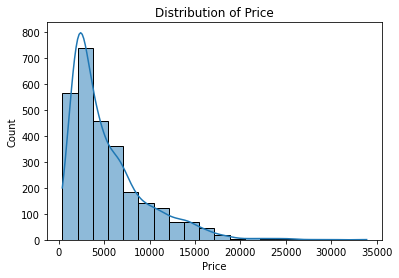

In [272]:
# 개별 열에 대한 분포 확인
sns.histplot(cars['Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

<h1><span? style="color:blue"> 8. 주성분 분석(PCA) </span>  
    <h3> 정보의 손실을 최소화 하는 작업(차원 축소)

In [249]:
from sklearn.decomposition import PCA

In [251]:
pca = PCA()

In [253]:
pca.fit(cars)

PCA()

In [255]:
pd.DataFrame(pca.transform(cars))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,-13591.439048,719.093440,-3.316557,-0.434107,-0.056434,0.761246,0.100118,-0.203918,-0.180777,-0.176310,0.504497,-0.865076,-0.188314,-0.152350,0.778465,0.579434,0.269094,0.462545,-0.129705,-0.515105,0.108203,0.110221,0.328477,0.319329,-0.036706,...,0.090359,-0.145937,-0.017868,-0.252807,0.047888,-0.138680,0.020906,-0.128913,0.030117,0.047324,-0.112838,0.002852,-0.002758,0.030239,-0.002104,-0.000323,-0.011559,-0.009471,0.018935,-0.016787,-0.001479,-0.001024,-0.003546,0.000404,0.000021
1,66370.367440,834.786113,1.259257,-0.787557,0.175750,1.073585,0.322101,-0.024301,-0.422699,0.221289,0.551023,-0.777295,0.342631,-0.374672,-0.441820,0.182491,0.783507,-0.927261,0.329552,-0.177048,-0.082849,-0.345912,-0.070680,0.405295,-0.060951,...,0.256815,-0.065809,0.007238,-0.119501,0.133243,-0.187395,-0.106866,0.083898,-0.031502,0.043480,-0.028919,-0.016732,0.007797,0.043171,-0.012057,-0.017960,-0.000653,0.008040,0.022657,0.003196,-0.018246,0.000693,0.000028,0.000756,-0.000961
2,500.529414,-3308.215775,0.821669,-0.789224,0.289032,0.820333,0.263755,0.097202,0.698938,-0.442411,0.123912,-0.773965,0.167684,-0.203271,-0.003061,0.078935,0.370426,0.655567,0.025900,-0.027741,-0.245060,-0.154347,0.008926,0.319172,0.106505,...,0.063107,-0.113647,0.055780,-0.193903,-0.011558,-0.113702,-0.024454,-0.029799,0.025147,0.064219,-0.002787,-0.008438,-0.004865,0.004145,0.003475,-0.005971,0.018488,0.008597,0.008827,-0.001464,0.003775,0.001111,-0.001148,0.000694,-0.000243
3,40527.755724,-286.593935,-2.173349,-0.411801,-0.243995,0.633522,0.261634,0.852000,-0.246880,-0.039291,0.020151,-0.970865,-0.668511,0.620247,0.102850,-0.369487,-0.514521,-0.314822,-0.550022,-0.165437,-0.398456,0.368054,0.310655,0.140889,0.195290,...,0.187978,-0.043912,0.050554,-0.310600,-0.114413,-0.066694,-0.148980,-0.110409,0.022548,0.099960,-0.036028,0.003554,0.030600,0.061768,0.000777,0.026666,0.013794,-0.030402,0.021767,-0.007039,0.008847,0.000603,-0.003081,0.000070,0.000642
4,-27475.226664,-4573.952834,6.432938,-1.224878,0.015826,0.505964,0.295243,0.185523,0.670896,-0.241939,0.329417,-0.774970,0.054913,0.118211,-0.077973,0.055130,-0.069108,-0.108789,-0.329462,0.278662,-0.194022,0.247433,0.125698,-0.057513,0.572959,...,0.277913,0.044787,-0.062328,0.069974,0.310577,-0.011963,-0.226593,-0.063110,-0.012170,0.010673,-0.004856,0.008970,-0.003091,0.224045,0.021139,-0.007306,-0.012066,0.006145,0.028434,-0.001040,0.007854,0.000158,-0.001763,-0.000275,0.000459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,-18344.077281,9537.822408,12.136008,2.035987,0.625716,0.723354,0.687458,0.749582,0.554554,0.922158,-0.327752,-0.423681,-0.178823,0.350998,-0.127560,-0.022841,0.813514,-0.568254,0.333992,0.145879,-0.374576,-0.144466,-0.315260,0.433040,-0.080895,...,-0.257754,0.100730,0.561226,0.295133,0.438023,-0.115975,-0.481298,0.273522,0.192426,0.118603,-0.057039,-0.010739,-0.011068,0.044239,-0.028753,-0.007315,-0.013452,-0.054554,-0.025434,-0.016702,-0.046653,-0.007762,0.003010,-0.007209,-0.000875
2788,-21206.165342,7253.434325,4.331888,0.281773,-0.724181,-0.090468,0.411966,0.625338,0.001255,0.732300,0.058632,-0.825032,-0.187303,0.277497,0.028581,0.324234,-0.389221,-0.013305,-0.136895,0.559264,-0.132322,-0.122947,-0.177679,0.419602,-0.172198,...,-0.290302,-0.041715,0.045144,0.195907,0.078494,-0.264224,-0.023316,0.815092,-0.061913,0.081061,-0.134654,0.051519,-0.050657,-0.022567,0.030058,-0.112479,-0.021148,0.011006,-0.042745,-0.012750,-0.024294,-0.005782,0.001523,-0.005019,-0.000036
2789,-11978.848717,3926.776888,6.297450,0.016288,-0.099287,0.518298,0.550400,-0.155536,-0.307056,0.576497,0.040711,-0.927287,-0.819446,0.892148,0.036667,-0.047363,0.701528,-0.382307,-0.304577,-0.130562,-0.043109,-0.226425,-0.459

In [259]:
pca = PCA(2)

In [261]:
pd.DataFrame(pca.fit_transform(cars), columns = ['PC1', 'PC2'])

,PC1,PC2
0,-13591.439048,719.093440
1,66370.367440,834.786113
2,500.529414,-3308.215775
3,40527.755724,-286.593935
4,-27475.226664,-4573.952834
...,...,...
2787,-18344.077281,9537.822408
2788,-21206.165342,7253.434325
2789,-11978.848717,3926.776888
2790,-41338.296842,5078.867223


In [268]:
(pca.explained_variance_ratio_).sum() #거의 정보 손실이 없음.  두 개의 PCA만으로 정보 손실 없이 차원을 축소하는 것이 가능

0.9999999876483867

In [269]:
cars.corr()

,Price,Mileage(miles),Registration_Year,Doors,Seats,Title_FORD FIESTA,Title_FORD FOCUS,Title_Others,Title_VAUXHALL ASTRA,Title_VAUXHALL CORSA,Fuel type_Diesel Hybrid,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Previous Owners_2.0,Previous Owners_3.0,...,Engine_other,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6,Emission Class_Others,Brand_BMW,Brand_CITROEN,Brand_FORD,Brand_HONDA,Brand_MERCEDES-BENZ,Brand_NISSAN,Brand_Others,Brand_PEUGEOT,Brand_RENAULT,Brand_TOYOTA,Brand_VAUXHALL,Brand_VOLKSWAGEN,Country_Germany,Country_Italy,Country_Japan,Country_Others,Country_South Korea,Country_United Kingdom,Country_United States,Service history_Unknown
Price,1.000000,-0.520106,0.748861,0.108201,0.020202,-0.044057,-0.060552,0.121444,-0.096442,-0.049420,0.081852,-0.176498,0.066031,0.107527,-0.041915,0.035347,-0.006687,-0.209252,-0.080458,0.062865,0.299285,0.054828,-0.143434,0.104105,-0.105904,...,-0.027891,-0.448908,-0.113026,0.701142,-0.059852,0.094856,-0.029742,-0.065980,-0.088963,0.095040,0.040255,0.046725,-0.019021,-0.016146,-0.075228,-0.078076,0.007962,0.145611,-0.043982,-0.073170,-0.017532,0.041590,0.004495,-0.077693,-0.076805
Mileage(miles),-0.520106,1.000000,-0.430270,-0.015038,0.109280,-0.012607,0.043386,-0.018682,0.049155,-0.110482,-0.025714,-0.255535,-0.016201,-0.000771,-0.000257,0.044436,0.136475,-0.136159,0.063688,0.020272,-0.063916,0.125405,-0.131339,-0.095884,0.054448,...,0.156973,0.228393,0.100887,-0.406733,0.009816,0.115497,-0.027197,0.007583,0.097233,0.072714,-0.006411,-0.087940,-0.087683,-0.070765,0.021239,-0.066180,0.046101,0.182241,-0.073315,0.054593,0.021680,-0.082722,-0.083190,0.012211,0.062741
Registration_Year,0.748861,-0.430270,1.000000,0.193359,0.059308,-0.000580,-0.023713,0.026904,-0.014342,0.060335,0.036056,-0.164379,0.035971,0.061839,-0.118733,-0.062101,0.022382,0.010825,-0.048301,0.035725,0.191414,-0.108929,0.164495,0.140141,-0.044276,...,-0.147979,-0.588926,0.130659,0.715935,-0.208316,-0.051849,0.029298,-0.010403,-0.146852,-0.023148,0.043158,0.039636,0.030647,0.041445,-0.103469,0.101316,-0.043054,-0.075904,0.005943,-0.121184,0.013311,0.090238,0.088690,-0.017878,-0.095998
Doors,0.108201,-0.015038,0.193359,1.000000,0.523962,-0.032434,0.110331,0.035157,0.087808,-0.049444,-0.006324,-0.151571,0.012507,-0.005505,-0.426386,-0.410555,0.144201,0.071330,0.151083,0.000200,0.266490,-0.115266,0.076820,0.060698,0.010717,...,-0.029941,-0.072066,0.021115,0.111740,-0.030847,-0.125766,0.066303,0.069125,0.041270,-0.131730,0.123224,-0.042255,-0.005733,0.027221,0.062439,0.043577,-0.004122,-0.184751,-0.158084,0.135879,0.049840,0.098306,-0.040036,0.082902,-0.032062
Seats,0.020202,0.109280,0.059308,0.523962,1.000000,0.035337,0.034898,-0.049572,0.030509,0.045992,0.003579,-0.193561,-0.012565,0.008008,-0.417638,-0.238899,0.030591,-0.101055,0.403010,0.006200,0.167835,0.059275,-0.010526,0.046408,0.015563,...,0.027174,-0.018878,0.037961,0.006533,-0.008797,-0.054167,0.007137,0.068021,0.018886,-0.098674,0.102815,-0.139029,-0.036037,0.073207,0.032940,0.095593,0.012691,-0.084332,-0.172602,0.066231,0.028344,0.020770,-0.002598,0.082246,-0.019640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Country_Others,-0.017532,0.021680,0.013311,0.049840,0.028344,-0.048141,-0.043673,0.117713,-0.046305,-0.057556,-0.004478,-0.034253,-0.016796,-0.010021,-0.024382,-0.020862,0.172779,-0.011841,-0.029227,-0.007760,-0.052139,0.011699,0.019676,0.019766,0.006306,...,0.012974,0.007424,0.019323,-0.026794,0.022581,-0.070045,-0.043427,-0.085124,-0.044645,-0.053744,-0.052073,0.404001,-0.059103,-0.049920,-0.045363,-0.095334,-0.064293,-0.133856,-0.047230,-0.103708,1.000000,-0.054155,-0.116519,-0.088984,-0.007354
Coun

### 회고: 데이터를 합치는 다양한 메서드를 배웠고, 집계 및 그룹화, 피벗테이블, 원-핫-인코딩, 스케일링, PCA까지 정말 다양한 개념을 실전 프로젝트를 통해 익혔다. 점점 손에 익는다는 기쁜 소식도 있지만 점점 해야 할 것이 많아지고 깊게 이해해야 할 부분도 늘었다. 원-핫-인코딩 과정에서 각 column의 고유값을 처리하는 방법(임계치 설정 여부 등)을 더욱 다양하게 시도해보고 결과를 비교해보고 싶다. 아직 머신러닝 과정까지는 가지 않았지만 대략 이 데이터 프레임이 어떻게 사용될 지 큰 그림이 그려졌다. PCA에 관한 내용은 개념 자체는 이해가 되지만 아직 다양한 것을 하지 않아 확실히 이해하기 어려웠다.

### 너무 늦게 제출해서 죄송합니다.